Face Detection: 

By checking if my camera can detect my face.

In [2]:
import cv2

def detect():
    face_cascade_path = r'C:\Users\acer\Documents\Kui\DataScie\haarcascade_frontalface_default.xml'
    face_cascade = cv2.CascadeClassifier(face_cascade_path)

    camera = cv2.VideoCapture(0)

    while True:
        ret, frame = camera.read()
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        faces = face_cascade.detectMultiScale(gray, 1.3, 5)

        for (x, y, w, h) in faces:
            img = cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            roi_gray = gray[y:y + h, x:x + w]
            roi_color = frame[y:y + h, x:x + w]

        cv2.imshow("camera", frame)
        if cv2.waitKey(1) & 0xFF == ord(" "):
            break

    camera.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    detect()

Output:

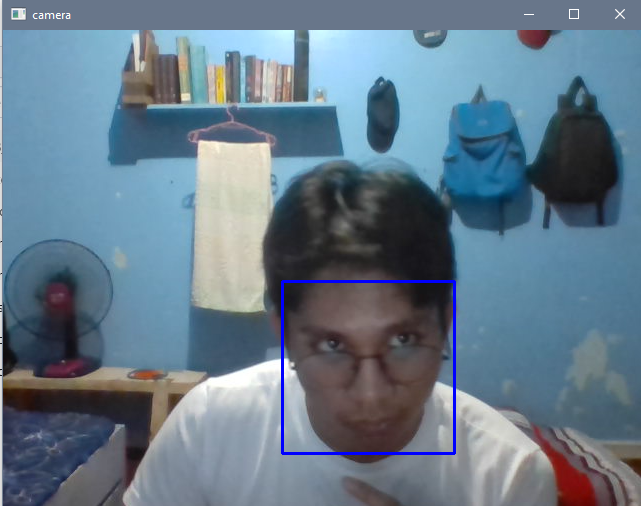

Mood Detection

In [ ]:
# Importing necessary libraries
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
from deepface import DeepFace
import cv2
import numpy as np

# Loading the pre-trained model and defining the face classifier
face_classifier = cv2.CascadeClassifier(r'C:\Users\acer\Documents\Kui\DataScie\haarcascade_frontalface_default.xml')

# Defining the emotion labels
emotion_labels = ['Angry','Happy','Confuse', 'Sad', 'Fear','Neutral']

# Opening the video capture:
cap = cv2.VideoCapture(0)

# Starting the main loop for video processing:
while True:
    ret, frame = cap.read()

    # Check if the frame is empty or not properly read
    if not ret:
        print("Error: Failed to read frame")
        break

    # Detecting faces in the frame
    gray_frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    rgb_frame = cv2.cvtColor(gray_frame, cv2.COLOR_GRAY2RGB)
    faces = face_classifier.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Processing each detected face
    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        face_roi = rgb_frame[y:y+h,x:x+w]
        face_roi = cv2.resize(face_roi,(48,48),interpolation=cv2.INTER_AREA)

        if np.sum([face_roi])!=0:
            roi = face_roi.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)

            # Perform emotion analysis on the face ROI
            result = DeepFace.analyze(face_roi, actions=['emotion'], enforce_detection=False)

            # Determine the dominant emotion
            emotion = result[0]['dominant_emotion']

            # Displaying the results
            cv2.putText(frame, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        else:
            cv2.putText(frame,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    cv2.imshow('Mood Detector',frame)
    if cv2.waitKey(1) & 0xFF == ord(" "):
        break
        
# Releasing resources
cap.release()
cv2.destroyAllWindows()

Sample Outputs:
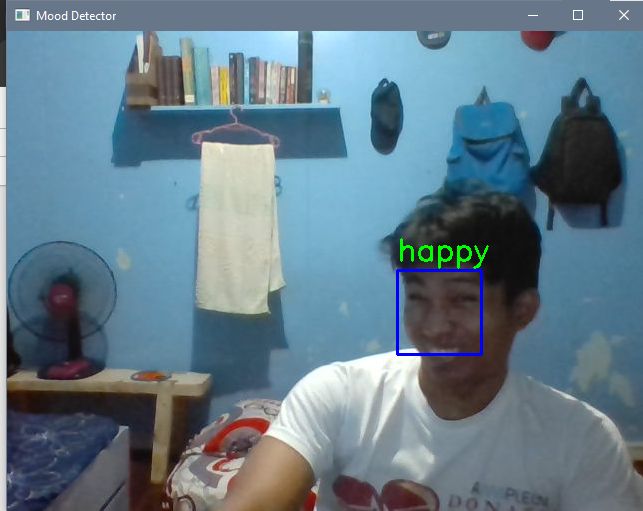